\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a) {-}

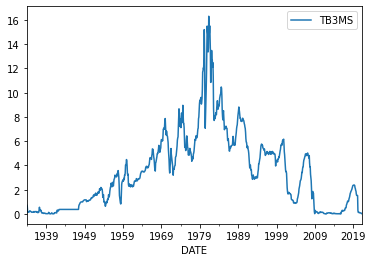

In [4]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1934, 1, 1)
end = datetime.datetime(2021, 3, 1)

tb3ms = web.DataReader('TB3MS', 'fred', start, end)
tb3ms.plot()
pass

## (b) {-}

In [39]:
import numpy as np
import statsmodels.tsa.api as smt

smt.stattools.adfuller(np.diff(tb3ms.values.ravel(), n=0))

(-1.99768609451749,
 0.2875885868267768,
 21,
 1025,
 {'1%': -3.43674585579594,
  '5%': -2.8643638720413227,
  '10%': -2.5682735516954196},
 532.4445434006693)

In [40]:
smt.stattools.adfuller(np.diff(tb3ms.values.ravel(), n=1))

(-7.807198416577612,
 7.228526169719172e-12,
 20,
 1025,
 {'1%': -3.43674585579594,
  '5%': -2.8643638720413227,
  '10%': -2.5682735516954196},
 535.0645589781107)

## (c) {-}

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import statsmodels.tsa.api as smt

y = np.diff(tb3ms.values.ravel(), n=1)
res = smt.stattools.arma_order_select_ic(y, ic=['aic', 'bic'], trend='nc')
print('AIC min order: ', res.aic_min_order)
print('BIC min order: ', res.bic_min_order)

AIC min order:  (4, 2)
BIC min order:  (3, 2)


## (d) {-}

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(model.resid, lags=[10])

(array([55.7190117]), array([2.31729424e-08]))

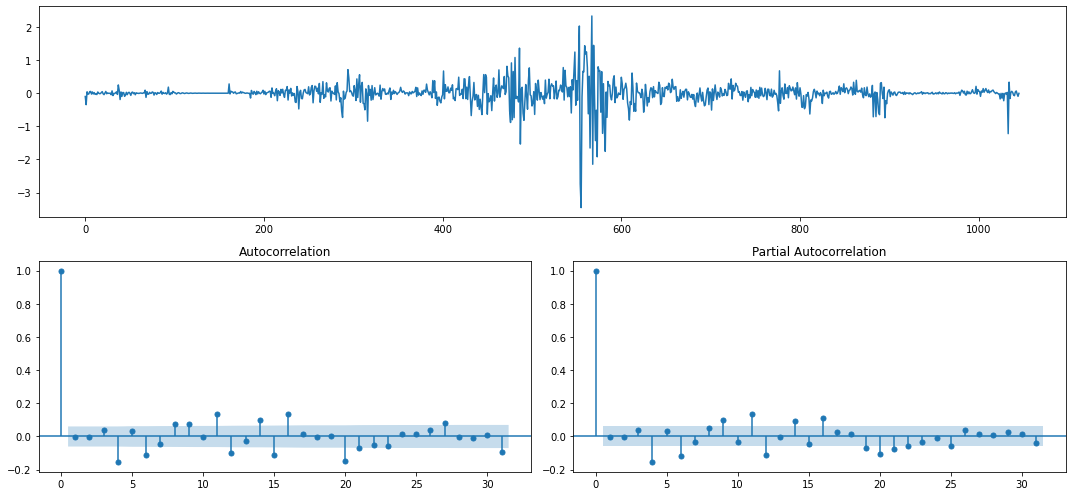

In [26]:
from statsmodels.tsa.arima_model import ARMA
from pandas import Series
import matplotlib.pyplot as plt

model = ARMA(y, (4, 2)).fit(trend='nc', disp=0)

fig = plt.figure(figsize=(15, 7))
layout = (2,2)
ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
pacf_ax = plt.subplot2grid(layout, (1,1))
acf_ax = plt.subplot2grid(layout, (1,0))

Series(model.resid).plot(ax=ts_ax)
smt.graphics.plot_acf(model.resid, ax=acf_ax)
smt.graphics.plot_pacf(model.resid, ax=pacf_ax)

plt.tight_layout()
plt.show()